In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
def plot_curve(file_name, label, start, end, measure, time, time_limit, limit):
    
    f = open(file_name,)
    data = json.load(f)
    if time_limit:
        data['iterations'] = [float(i) for i in data['iterations'] if float(i) < limit]
        end = len(data['iterations']) - 1
    plt.plot(data[time][start:end],data[measure][start:end], label = label, linewidth=3)

In [3]:
def plot_curve_aggregate_3(file_name1, file_name2, file_name3, label, start, end, measure, time, time_limit, limit):
    
    f = open(file_name1,)
    data1 = json.load(f)
    f = open(file_name2,)
    data2 = json.load(f)
    f = open(file_name3,)
    data3 = json.load(f)
    zipped_lists = zip(data1[measure][start:end], data2[measure][start:end], data3[measure][start:end])
    summedList = [x + y + z for (x, y, z) in zipped_lists]
    if time_limit:
        data['iterations'] = [float(i) for i in data['iterations'] if float(i) < limit]
        end = len(data['iterations']) - 1
    averagedList = [number / 3 for number in summedList]
    plt.plot(data1[time][start:end], averagedList, label = label, linewidth=3)

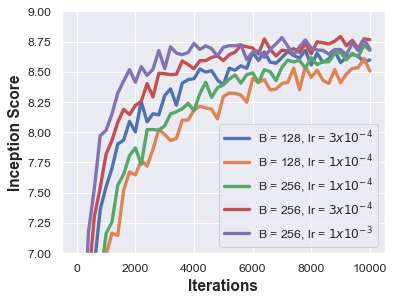

In [4]:
sns.set()
plt.figure(figsize=(5.2, 4), dpi=80)
fids = []
start = 0
end = 51
measure = 'inception_means'#'inception_means'
time = 'iterations'
limit = 2500
restriction = False
  
    
plot_curve('results/curves128_3-4.json',  "B = 128, lr = $3x10^{-4}$", start, end, measure, time,restriction, limit)
plot_curve('results/curves128_1-4.json',  "B = 128, lr = $1x10^{-4}$", start, end, measure, time,restriction, limit)

# f = open('results/curves256_1-4.json',)
# data = json.load(f)
# label = "B = 256, lr = $1x10^{-4}$"
# plt.plot(data[time][start:end],data[measure][start:end], label = label, linewidth=3)
plot_curve('results/curves256_1-4.json', "B = 256, lr = $1x10^{-4}$", start, end, measure, time,restriction, limit)
plot_curve('results/curves256_3-4.json', "B = 256, lr = $3x10^{-4}$", start, end, measure, time,restriction, limit)
plot_curve('results/curves256_1-3.json', "B = 256, lr = $1x10^{-3}$", start, end, measure, time,restriction, limit)


plt.xlabel("Iterations", fontsize = 14, fontweight = 'bold')
plt.ylabel("Inception Score", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.ylim(7, 9)
plt.savefig('results\Graph Images\BigBatchExtraGradIS.png')
plt.show()

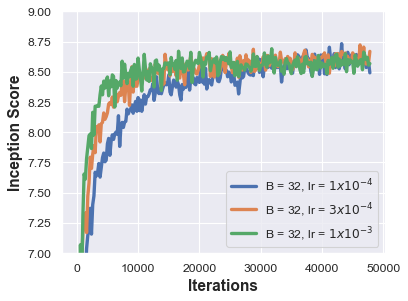

In [5]:

plt.figure(figsize=(5.2, 4), dpi=80)

restriction = False
end = 240
time = 'iterations'
plot_curve('results/curves32_1-4.json',  "B = 32, lr = $1x10^{-4}$", start, end, measure, time,restriction, limit)
plot_curve('results/curves32_3-4.json',  "B = 32, lr = $3x10^{-4}$", start, end, measure, time,restriction, limit)
plot_curve('results/curves32_1-3.json',  "B = 32, lr = $1x10^{-3}$", start, end, measure, time,restriction, limit)

    
plt.xlabel("Iterations", fontsize = 14, fontweight = 'bold')
plt.ylabel("Inception Score", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.ylim(7, 9)
plt.savefig('results\Graph Images\SmallBatchExtraGradIS.png')
plt.show()

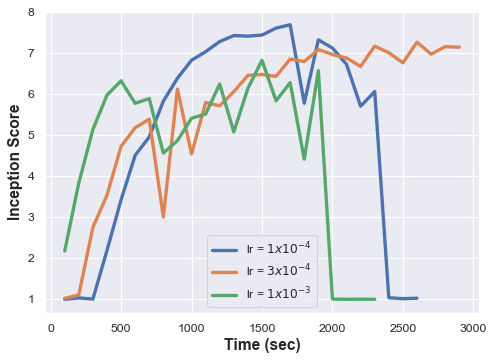

In [6]:

plt.figure(figsize=(7, 5), dpi=80)

plot_curve('results/curvesVAR_1-4.json',  "lr = $1x10^{-4}$", start, end, measure, time,restriction, limit)
plot_curve('results/curvesVAR_3-4.json',  "lr = $3x10^{-4}$", start, end, measure, time,restriction, limit)
plot_curve('results/curvesVAR_1-3.json',  "lr = $1x10^{-3}$", start, end, measure, time,restriction, limit)

    
plt.xlabel("Time (sec)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Inception Score", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.savefig('results\Graph Images\VarIS.png')
plt.show()

In [7]:
folderNames = [x[0] for x in os.walk("results\LA")]

In [8]:
folderNames

['results\\LA',
 'results\\LA\\B=256, lr=1e-3',
 'results\\LA\\B=256, lr=1e-4',
 'results\\LA\\B=256, lr=3e-4',
 'results\\LA\\B=32, lr=1e-3',
 'results\\LA\\B=32, lr=1e-4',
 'results\\LA\\B=32, lr=3e-4']

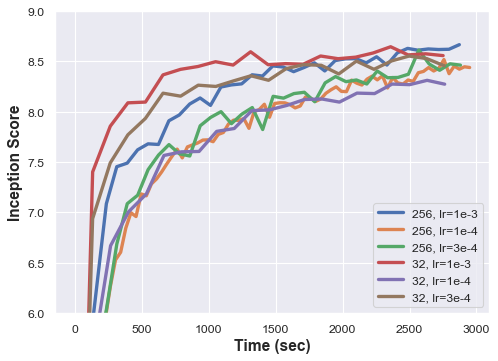

In [9]:
sns.set()
plt.figure(figsize=(7, 5), dpi=80)
fids = []
start = 0
end = 40
measure = 'inception_means'#'inception_means'
time = 'times'
limit = 3000
restriction = True


for name in folderNames[1:]:
    file_name = "{}\curves.json".format(name)
    f = open(file_name,)
    data = json.load(f)
    if restriction:
        data['times'] = [float(i) for i in data['times'] if float(i) < limit]
        end = len(data['times']) - 1
    plt.plot(data[time][start:end],data[measure][start:end], label = name[13:], linewidth=3)
    
    
plt.xlabel("Time (sec)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Inception Score", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.savefig('results\Graph Images\LookaheadIS.png')
plt.ylim(6, 9)

plt.show()

In [10]:
folderNamesVar = [x[0] for x in os.walk("results\VarReduction + LA")]

In [11]:
folderNamesVar

['results\\VarReduction + LA',
 'results\\VarReduction + LA\\B=256, lr=1e-4',
 'results\\VarReduction + LA\\B=256, lr=3e-4',
 'results\\VarReduction + LA\\B=256, lr=3e-5',
 'results\\VarReduction + LA\\B=32, lr=1e-4',
 'results\\VarReduction + LA\\Best parameters']

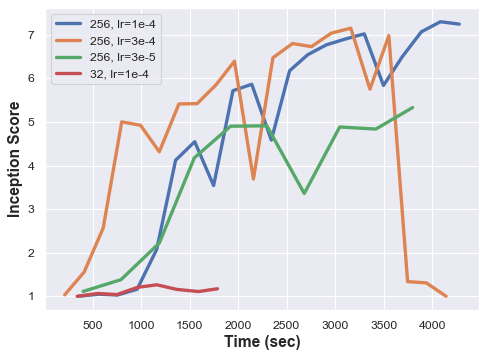

In [12]:
plt.figure(figsize=(7, 5), dpi=80)
fids = []
start = 0
end = 40
measure = 'inception_means'#'inception_means'
time = 'times'
limit = 4500

restriction = True


for name in folderNamesVar[1:5]:
    file_name = "{}\curves.json".format(name)
    f = open(file_name,)
    data = json.load(f)
    if restriction:
        data['times'] = [float(i) for i in data['times'] if float(i) < limit]
        end = len(data['times']) - 1
    plt.plot(data[time][start:end],data[measure][start:end], label = name[28:], linewidth=3)
    
plt.xlabel("Time (sec)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Inception Score", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.savefig('results\Graph Images\LookaheadVarIS.png')
plt.show()

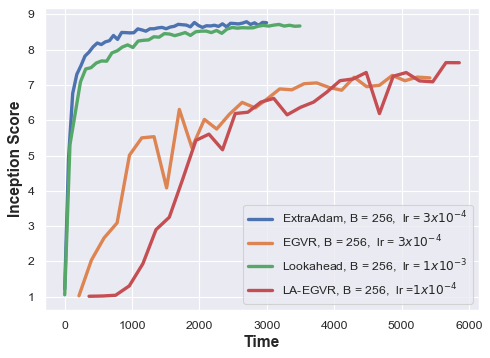

In [13]:
plt.figure(figsize=(7, 5), dpi=80)
fids = []
start = 0
end = 250
measure = 'inception_means'#'inception_means'
time = 'times'
restriction = False

plot_curve('results/curves256_3-4.json', "ExtraAdam, B = 256,  lr = $3x10^{-4}$", start, end, measure, time,restriction, limit)

plot_curve_aggregate_3('results/VarReductionBest/curves13.json','results/VarReductionBest/curves14.json','results/VarReductionBest/curves13.json',
                       "EGVR, B = 256,  lr = $3x10^{-4}$", start, end, measure, time,restriction, limit)

plot_curve('results/LA/B=256, lr=1e-3/curves.json',  "Lookahead, B = 256,  lr = $1x10^{-3}$", start, end, measure, time,restriction, limit)

plot_curve_aggregate_3('results/VarReduction + LA/Best parameters/curves13.json','results/VarReduction + LA/Best parameters/curves12.json','results/VarReduction + LA/Best parameters/curves11.json',
                       "LA-EGVR, B = 256,  lr =$1x10^{-4}$", start, end, measure, time,restriction, limit)

plt.xlabel("Time", fontsize = 14, fontweight = 'bold')
plt.ylabel("Inception Score", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.savefig('results\Graph Images\BestIS.png')
plt.show()
